# Conhecendo as Funções de Ativação

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  

## Apresentação

No contexto das redes neurais artificiais, as funções de ativação representam as transformações aplicadas às entradas do neurônio sujeitas aos respectivos graus de contribuição (pesos) para decidir se este neurônio deve ou não disparar. Ao considerar as redes neurais feedforward multilayer perceptron, tais funções de ativação devem ser contínuas e deriváveis, sendo responsáveis por realizarem transformações não-lineares sucessivas da informação fornecida na camada de entrada até a camada de saída, fazendo com que o problema vá tornando-se linearmente separável à medida que adentra-se na rede.

Neste notebook, o seu objetivo é conhecer melhor as funções de ativação disponíveis na literatura e suas respectivas derivadas. Você irá construir gráficos que ilustrem tais funções.

## Requisitos

- Utilizar numpy
- Plotar com matplotlib

In [1]:
# Célula reservada para importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import math

## Intervalo de Entrada

- Todas as funções devem ser ilustradas no intervalo [-4,+4] com amostras intervaladas em 0.1 no eixo x
- Consulte a documentação de numpy.arange sobre como fazê-lo
- https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange
- Quantas amostras há em tal espaço de entrada?
- Qual o tipo deste dado?
- Qual a forma do espaço de entrada?

In [2]:
sample = np.arange(-4.0,4.0,0.1)

In [3]:
print(sample.size)

80


In [4]:
print(sample.dtype)

float64


In [5]:
sample = np.around(sample,decimals=5)
sample.resize(sample.size,1)
print(sample.shape)

(80, 1)


### Função de ativação sigmoide

$$f(x) = \frac{1}{1 + e^{-\beta \cdot x}}$$

- Implemente uma função em Python que retorne o valor da função sigmóide para uma dada entrada
- Nesta função, considere beta como parâmetro nomeado com valor igual a 1.0
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função sigmoide
- Em um mesmo gráfico, ilustre 3 valores distintos para $\beta$:
  - $\beta = 0.7$ na cor laranja
  - $\beta = 0.5$ na cor verde
  - $\beta = 0.3$ na cor vermelha
  - Use legendas no gráfico

In [6]:
def sigmoid(x, beta):
    result = []
    for i in range(x.size):
        result = np.insert(result,i ,(1/(1+math.exp(-x[i]*beta))), axis=0)
    return result

def sigmoidDerivate(x, beta):
    result = []
    for i in range(x.size):
        result = np.insert(result, i, (beta*math.exp(-x[i]*beta))/(1+2*math.exp(-x[i]*beta)+math.exp(-x[i]*2*beta)))
    return result

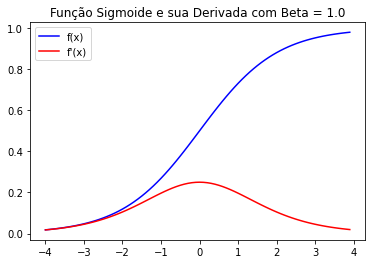

In [7]:
result1 = sigmoid(sample, 1.0)
derivateResult1 = sigmoidDerivate(sample, 1.0)
plt.title("Função Sigmoide e sua Derivada com Beta = 1.0")
plt.plot(sample, result1, "blue", label="f(x)" )
plt.plot(sample, derivateResult1, "red", label="f'(x)")
plt.legend()
plt.show()

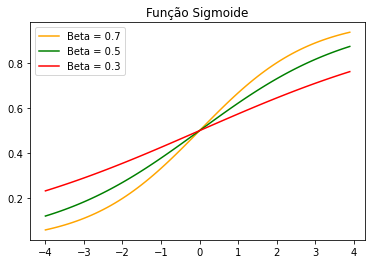

In [8]:
result2 = sigmoid(sample,0.7)
result3 = sigmoid(sample,0.5)
result4 = sigmoid(sample,0.3)
plt.title("Função Sigmoide")
plt.plot(sample,result2, "orange", label="Beta = 0.7")
plt.plot(sample,result3, "green", label="Beta = 0.5")
plt.plot(sample,result4, "red", label = "Beta = 0.3")
plt.legend()
plt.show()

### Função de Ativação ReLU (Unidade Linear Retificada)

$$f(x) = max(0,x)$$

- Implemente uma função em Python que retorne o valor da função ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função ReLU

In [9]:
def ReLU(x):
    return np.maximum(0,x)

def reluDerivate(x):
    return np.where(x <= 0, 0, 1)

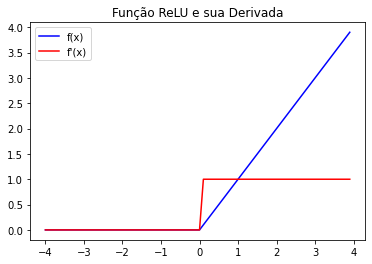

In [10]:
plt.title("Função ReLU e sua Derivada")
plt.plot(sample,ReLU(sample), "blue", label="f(x)")
plt.plot(sample,reluDerivate(sample), "red",label="f'(x)")
plt.legend()
plt.show()

### Função de ativação linear (purelin)

$$f(x) = x$$

- Implemente uma função em Python que retorne o valor da função linear para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão

In [11]:
def linear(x):
    return x

def linearDerivate(x):
    return np.ones(x.size)

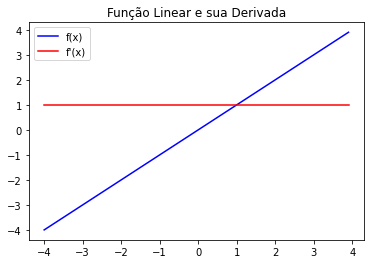

In [12]:
plt.title("Função Linear e sua Derivada")
plt.plot(sample, linear(sample), "blue", label="f(x)")
plt.plot(sample, linearDerivate(sample), "red", label="f'(x)")
plt.legend()
plt.show()

### Função de ativação Tangente Hiperbólica

$$f(x) = tanh(x)$$

- Implemente uma função em Python que retorne o valor da função tangente hiperbólica para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão
- Utilize bibliotecas para auxiliar nesta tarefa
- Considere o intervalo (-1,1)

In [13]:
def hyperbolicTangent(x):
    result = []
    for i in range(x.size):
        result = np.insert(result,i ,(math.tanh(x[i])), axis=0)
    return result

def hyperbolicTangDerivate(x):
    result = []
    for i in range(x.size):
        result = np.insert(result, i, (4/(math.exp(2*x[i])+math.exp(-2*x[i]) + 2)), axis=0)
    return result

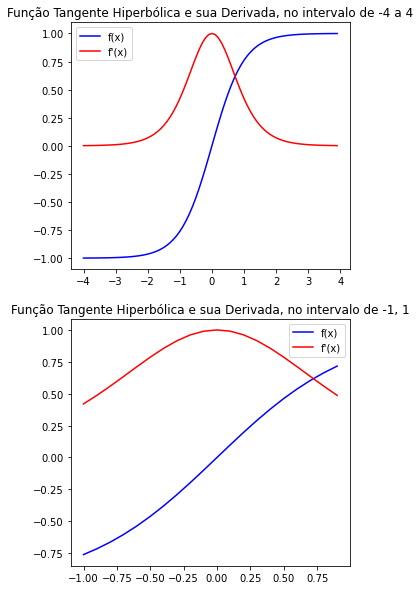

In [14]:
newSample = np.arange(-1.0,1.0,0.1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5,10))
ax1.set_title("Função Tangente Hiperbólica e sua Derivada, no intervalo de -4 a 4")
ax1.plot(sample, hyperbolicTangent(sample), "blue", label="f(x)")
ax1.plot(sample, hyperbolicTangDerivate(sample), "red", label="f'(x)")
ax1.legend()

ax2.set_title("Função Tangente Hiperbólica e sua Derivada, no intervalo de -1, 1")
ax2.plot(newSample, hyperbolicTangent(newSample), "blue", label="f(x)")
ax2.plot(newSample, hyperbolicTangDerivate(newSample), "red", label="f'(x)")
ax2.legend()

plt.show()

### Função de Ativação Gaussiana

$$f(x) = \exp \left( \frac{-(x - \mu)^2}{2\sigma^2} \right)$$

- $\mu$ é o ponto médio (centro) da curva
- $\sigma$ denota o raio de abertura
- Implemente uma função em Python que retorne o valor da função gaussiana para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão


Considere também os seguintes valores ao plotar a função

- Parâmetros nomeados $\mu = 0$ e $\sigma = 1$
- $\mu = 0, \sigma = 0.3$
- $\mu = 0, \sigma = 0.5$
- $\mu = 0, \sigma = 0.7$
- $\mu = 0, \sigma = 0.9$
- $\mu = 0, \sigma = 1.1$

In [15]:
def gaussianFunction(midPoint, openingRadius, x):
    result = []
    for i in range(x.size):
        result = np.insert(result, i, math.exp((-(x[i]-midPoint)**2)/(2*openingRadius)**2),axis=0)
    return result

def gaussianDerivate(midPoint, openingRadius, x):
    result = []
    for i in range(x.size):
        result = np.insert(result, i, (x[i]+midPoint)/(openingRadius**2), axis=0)
    return result

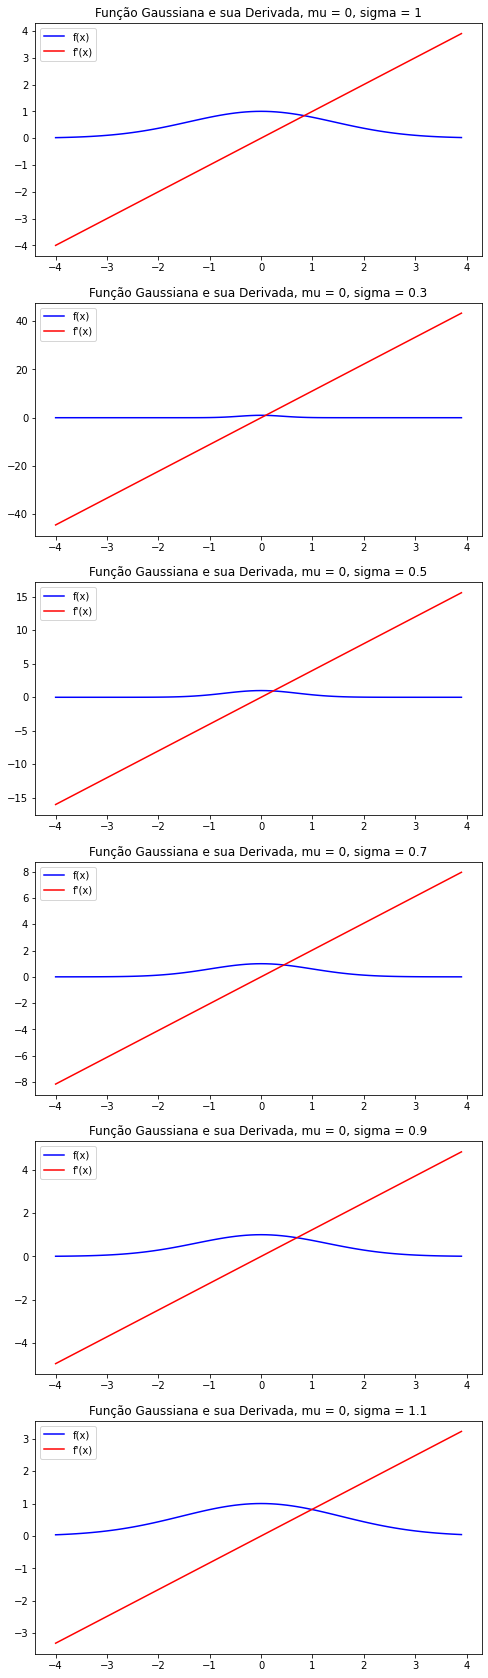

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,1, figsize=(8,30))

ax1.set_title("Função Gaussiana e sua Derivada, mu = 0, sigma = 1")
ax1.plot(sample, gaussianFunction(0, 1, sample), "blue", label="f(x)")
ax1.plot(sample, gaussianDerivate(0, 1, sample), "red", label="f'(x)")
ax1.legend()

ax2.set_title("Função Gaussiana e sua Derivada, mu = 0, sigma = 0.3")
ax2.plot(sample, gaussianFunction(0, 0.3, sample), "blue", label="f(x)")
ax2.plot(sample, gaussianDerivate(0, 0.3, sample), "red", label="f'(x)")
ax2.legend()

ax3.set_title("Função Gaussiana e sua Derivada, mu = 0, sigma = 0.5")
ax3.plot(sample, gaussianFunction(0, 0.5, sample), "blue", label="f(x)")
ax3.plot(sample, gaussianDerivate(0, 0.5, sample), "red", label="f'(x)")
ax3.legend()

ax4.set_title("Função Gaussiana e sua Derivada, mu = 0, sigma = 0.7")
ax4.plot(sample, gaussianFunction(0, 0.7, sample), "blue", label="f(x)")
ax4.plot(sample, gaussianDerivate(0, 0.7, sample), "red", label="f'(x)")
ax4.legend()

ax5.set_title("Função Gaussiana e sua Derivada, mu = 0, sigma = 0.9")
ax5.plot(sample, gaussianFunction(0, 0.9, sample), "blue", label="f(x)")
ax5.plot(sample, gaussianDerivate(0, 0.9, sample), "red", label="f'(x)")
ax5.legend()

ax6.set_title("Função Gaussiana e sua Derivada, mu = 0, sigma = 1.1")
ax6.plot(sample, gaussianFunction(0, 1.1, sample), "blue", label="f(x)")
ax6.plot(sample, gaussianDerivate(0, 1.1, sample), "red", label="f'(x)")
ax6.legend()


plt.show()

### Função de Ativação Leaky ReLU

$$f(x) = \left\{\begin{array}{cc} 0.01\cdot x & x < 0\\
x & x \geq 0
\end{array}
\right.$$

- Implemente uma função em Python que retorne o valor da função Leaky ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função Leaky ReLU

In [35]:
def leakyReLUFunction(x):
    result = []
    for i in range(x.size):
        value = 0.01 * x[i] if x[i] < 0 else x[i]
        result = np.insert(result, i, value ,axis=0)
    return result

def leakyReLUDerivate(x):
    return np.where(x < 0, 0.01, 1)

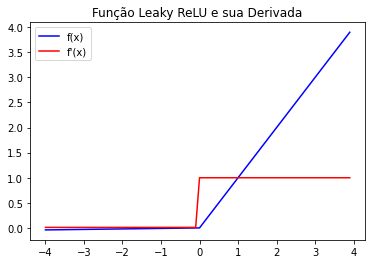

In [36]:
plt.title("Função Leaky ReLU e sua Derivada")
plt.plot(sample,leakyReLUFunction(sample), "blue", label="f(x)")
plt.plot(sample,leakyReLUDerivate(sample), "red",label="f'(x)")
plt.legend()
plt.show()